In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
x_train = train.drop(['label'],axis=1)
y_train = train['label']
x_test = test.drop(['label'],axis=1)
y_test = test['label']
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data to the required shape (28, 28, 1)
x_train_reshaped = x_train.values.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.values.reshape(-1, 28, 28, 1)


pullover


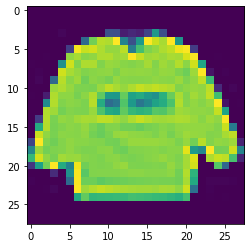

ankle boots


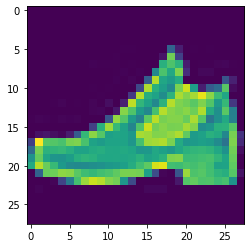

sneakers


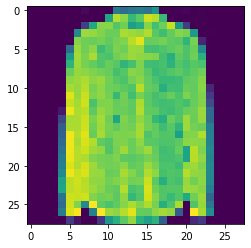

t-shirt


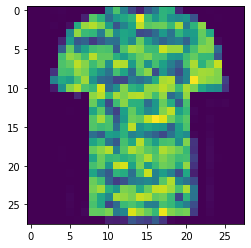

dress


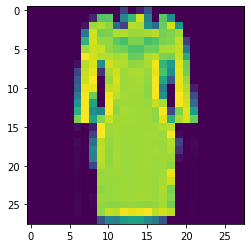

coat


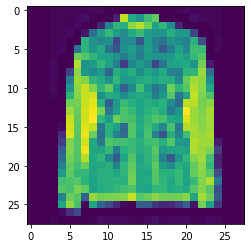

coat


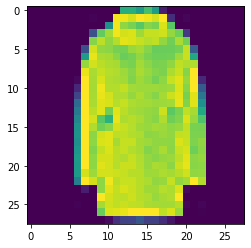

sandal


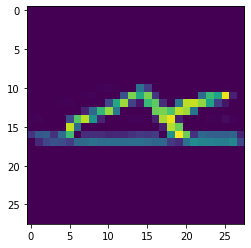

coat


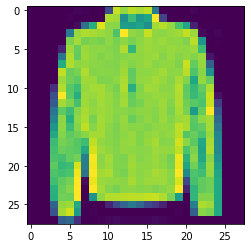

bag


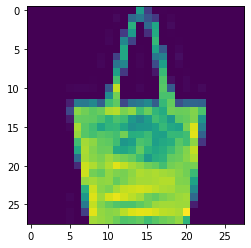

t-shirt


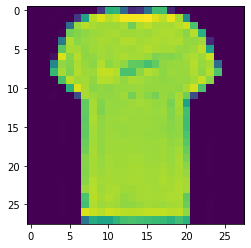

bag


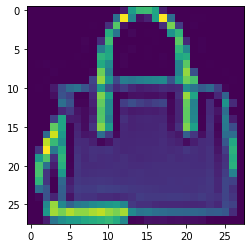

ankle boots


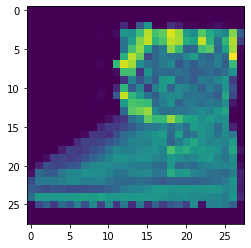

t-shirt


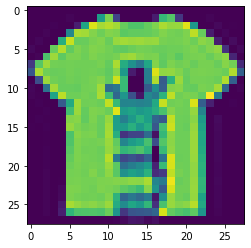

pullover


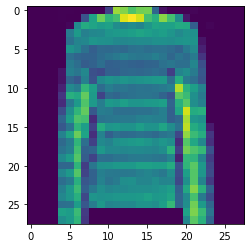

pullover


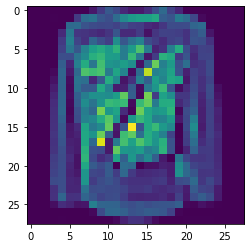

ankle boots


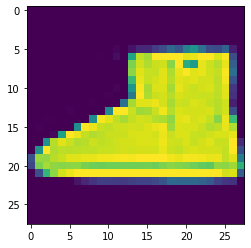

dress


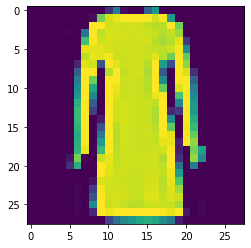

dress


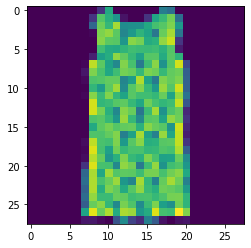

dress


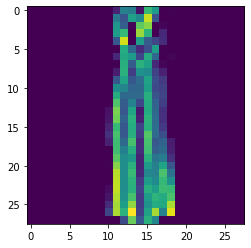

In [16]:
for i in range(20):
    print(labels[y_train[i]])
    plt.imshow(x_train_reshaped[i])
    plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [7]:
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3755 - accuracy: 0.8669 - val_loss: 0.2893 - val_accuracy: 0.8956
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2564 - accuracy: 0.9058 - val_loss: 0.2682 - val_accuracy: 0.9061
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2107 - accuracy: 0.9224 - val_loss: 0.2312 - val_accuracy: 0.9145
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1748 - accuracy: 0.9349 - val_loss: 0.2397 - val_accuracy: 0.9182
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1488 - accuracy: 0.9445 - val_loss: 0.2270 - val_accuracy: 0.9207


In [8]:
loss,acc = model.evaluate(x_test_reshaped,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2270 - accuracy: 0.9207


In [9]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

In [10]:
predictions = model.predict(x_test_reshaped[:1])

In [11]:
label = labels[np.argmax(predictions)]

t-shirt


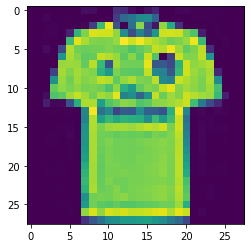

In [12]:
print(label)
plt.imshow(x_test_reshaped[:1][0])
plt.show()